In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
import math

In [10]:
height = 32
width = 64
channel = 3

In [11]:
clean_data_path = '/home/evren/classified_data/clean_data/clean_data'
# noisy_15dB_path = 'D:\\intern\\classified_data\\noisy_data\\15dB\\extra_15dB'
noisy_20dB_path = '/home/evren/classified_data/noisy_data/20dB/20dB'
# noisy_25dB_path = 'D:\\intern\\classified_data\\noisy_data\\25dB\\extra_25dB'
# noisy_30dB_path = 'D:\\intern\\classified_data\\noisy_data\\30dB\\extra_30dB'
noisy_100dB_path = '/home/evren/classified_data/noisy_data/100dB/100dB'

In [12]:
clean_data_files = os.listdir(clean_data_path)
# noisy_15dB_files = os.listdir(noisy_15dB_path)
noisy_20dB_files = os.listdir(noisy_20dB_path)
# noisy_25dB_files = os.listdir(noisy_25dB_path)
# noisy_30dB_files = os.listdir(noisy_30dB_path)
noisy_100dB_files = os.listdir(noisy_100dB_path)

In [13]:
clean_data = np.zeros((len(clean_data_files), height, width, channel), dtype=np.float32)
# noisy_15dB = np.zeros((len(noisy_15dB_files), height, width, channel), dtype=np.float32)
noisy_20dB = np.zeros((len(noisy_20dB_files), height, width, channel), dtype=np.float32)
# noisy_25dB = np.zeros((len(noisy_25dB_files), height, width, channel), dtype=np.float32)
# noisy_30dB = np.zeros((len(noisy_30dB_files), height, width, channel), dtype=np.float32)
noisy_100dB = np.zeros((len(noisy_100dB_files), height, width, channel), dtype=np.float32)

In [15]:
n=0
for i in tqdm(clean_data_files):
    img = cv2.imread(clean_data_path + '/' + i)
    img = cv2.resize(img, (width, height)) / 255.
    clean_data[n] = img
    n = n+1

100%|██████████| 69071/69071 [08:38<00:00, 133.29it/s] 


In [16]:
n=0
for i in tqdm(noisy_20dB_files):
    img = cv2.imread(noisy_20dB_path + '/' + i)[:,:,:channel]
    img = cv2.resize(img, (width, height)) / 255.
    noisy_20dB[n] = img
    n = n+1

100%|██████████| 69071/69071 [11:09<00:00, 103.24it/s]


In [17]:
n=0
for i in tqdm(noisy_100dB_files):
    img = cv2.imread(noisy_100dB_path + '/' + i)[:,:,:channel]
    img = cv2.resize(img, (width, height)) / 255.
    noisy_100dB[n] = img
    n = n+1

100%|██████████| 69071/69071 [12:14<00:00, 94.08it/s] 


In [23]:
model = Sequential([
    
  # encoder
    Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(height,width,channel)),
    BatchNormalization(),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    
    # decoder
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    
    Conv2D(3, (3,3), padding="same", activation="sigmoid") # sigmoid, relu  
    
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 64, 64)        1792      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 64, 64)        256       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 64, 64)        36928     
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 64, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 32, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 32, 32)        18464     
_________________________________________________________________
batch_normalization_12 (Batc (None, 16, 32, 32)       

In [32]:
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])


In [33]:
history = model.fit(noisy_100dB, clean_data,
          validation_split=0.2,
          batch_size=512,
          epochs=100,
          #callbacks=callbacks_list
        )

Train on 55256 samples, validate on 13815 samples
Epoch 1/100
55256/55256 [==============================] - 353s 6ms/sample - loss: 0.6690 - accuracy: 8.7778e-07 - val_loss: 0.6722 - val_accuracy: 6.3620e-07
Epoch 2/100
55256/55256 [==============================] - 351s 6ms/sample - loss: 0.6689 - accuracy: 8.7778e-07 - val_loss: 0.6709 - val_accuracy: 6.3620e-07
Epoch 3/100
55256/55256 [==============================] - 352s 6ms/sample - loss: 0.6689 - accuracy: 8.7483e-07 - val_loss: 0.6698 - val_accuracy: 6.3620e-07
Epoch 4/100
55256/55256 [==============================] - 353s 6ms/sample - loss: 0.6689 - accuracy: 8.7483e-07 - val_loss: 0.6693 - val_accuracy: 6.3620e-07
Epoch 5/100
55256/55256 [==============================] - 352s 6ms/sample - loss: 0.6689 - accuracy: 8.7483e-07 - val_loss: 0.6690 - val_accuracy: 6.3620e-07
Epoch 6/100
55256/55256 [==============================] - 353s 6ms/sample - loss: 0.6689 - accuracy: 8.7483e-07 - val_loss: 0.6688 - val_accuracy: 6.3620e

Epoch 52/100
55256/55256 [==============================] - 355s 6ms/sample - loss: 0.6688 - accuracy: 8.7189e-07 - val_loss: 0.6687 - val_accuracy: 6.3620e-07
Epoch 53/100
55256/55256 [==============================] - 355s 6ms/sample - loss: 0.6688 - accuracy: 8.7189e-07 - val_loss: 0.6687 - val_accuracy: 6.3620e-07
Epoch 54/100
55256/55256 [==============================] - 356s 6ms/sample - loss: 0.6688 - accuracy: 8.7189e-07 - val_loss: 0.6687 - val_accuracy: 6.3620e-07
Epoch 55/100
55256/55256 [==============================] - 356s 6ms/sample - loss: 0.6688 - accuracy: 8.7189e-07 - val_loss: 0.6687 - val_accuracy: 6.3620e-07
Epoch 56/100
55256/55256 [==============================] - 357s 6ms/sample - loss: 0.6688 - accuracy: 8.7189e-07 - val_loss: 0.6687 - val_accuracy: 6.3620e-07
Epoch 57/100
55256/55256 [==============================] - 357s 6ms/sample - loss: 0.6688 - accuracy: 8.7189e-07 - val_loss: 0.6687 - val_accuracy: 6.3620e-07
Epoch 58/100
55256/55256 [==============

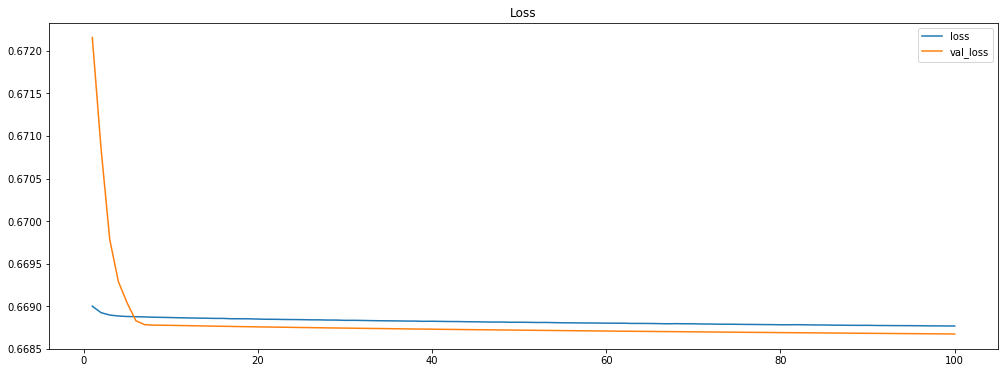

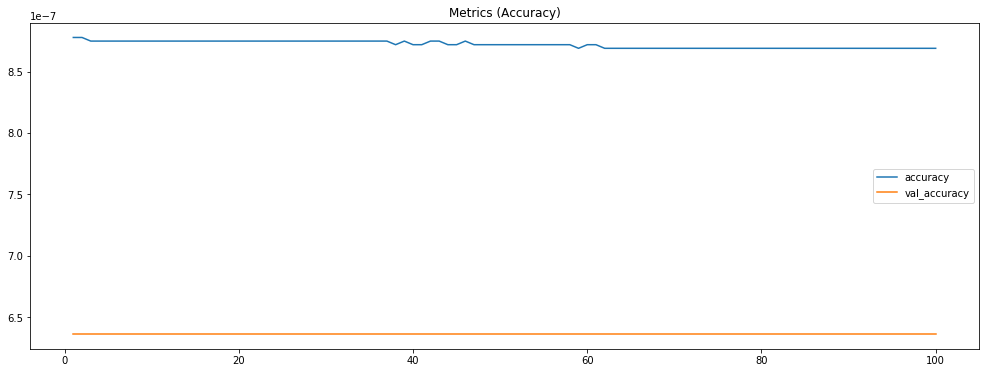

In [34]:
plt.rcParams['figure.figsize'] = (17,6)
fig, ax1 = plt.subplots()
xepochs = range(1,len(history.history['loss']) + 1)

plt.plot(xepochs, history.history['loss'], label = 'loss')
plt.plot(xepochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(xepochs, history.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [35]:
decoded_20dB = model.predict(noisy_20dB)

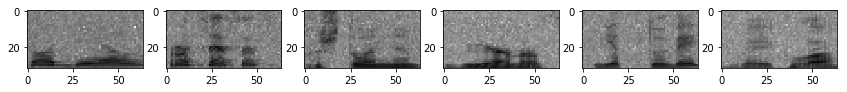

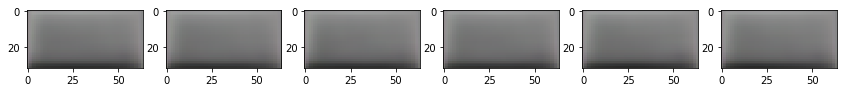

In [36]:
# Displaying prediction images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(noisy_20dB[i])
plt.show()

# Displaying prediction_train images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(decoded_20dB[i])
plt.show()

In [37]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse)) 
    return psnr

In [41]:
print({PSNR(noisy_20dB, decoded_20dB)})
print()

for i in range(len(noisy_20dB)):
    
    value = PSNR(noisy_20dB[i], decoded_20dB[i]) 
    print({value})

set([66.98178255487244])
()
set([66.91900520197584])
set([69.42389216463744])
set([67.44314779893828])
set([67.55368026433344])
set([67.5516692281394])
set([67.04965810005525])
set([67.47391366971682])
set([68.02646890102275])
set([68.60983111476455])
set([65.70168985149512])
set([66.32883327971892])
set([68.31216884592048])
set([66.31117543661992])
set([65.95296431705063])
set([67.03430331571589])
set([67.38831154427002])
set([67.58730086292208])
set([67.24366229250342])
set([67.84826045153144])
set([68.21289464993383])
set([66.85582423541987])
set([67.70481245384251])
set([66.46522213457507])
set([67.04939322812717])
set([64.12914205150014])
set([66.56886541059396])
set([65.06198413501392])
set([66.80275522370435])
set([67.07944137291247])
set([66.72229474870346])
set([67.47350375948692])
set([65.81058175137348])
set([69.29266520988584])
set([64.73303039599075])
set([65.5411210861291])
set([68.02217329239896])
set([66.0509226223287])
set([67.46525606680987])
set([67.96844165064813])


set([64.38188976608194])
set([67.73034990441688])
set([67.16483318415666])
set([68.31446359179124])
set([65.11277759690802])
set([65.72443573501415])
set([65.64782413835864])
set([68.59711455855603])
set([66.2154494580081])
set([68.01438384364783])
set([66.83459359382432])
set([65.5162029570208])
set([65.28884978097452])
set([67.95824969643702])
set([66.95402992822511])
set([65.95809589316983])
set([65.96702441238659])
set([66.94070984533836])
set([66.33991932390114])
set([67.4455634119167])
set([66.13988785721506])
set([65.75420276883384])
set([68.45349459118334])
set([67.80744477068484])
set([68.16980687153546])
set([67.54929152980216])
set([67.04554463331043])
set([66.5712556262643])
set([66.22818035117777])
set([65.18252110653565])
set([69.25198999022416])
set([66.01683895214731])
set([66.54827911156035])
set([66.99878836439966])
set([67.03062472446786])
set([65.8514992863078])
set([68.72431595318187])
set([68.59553514395729])
set([67.34689182760305])
set([67.23073468047828])
set([

set([66.29384319130095])
set([66.87097672938053])
set([68.55996984043693])
set([69.62467302029296])
set([65.52807523234353])
set([67.31817489741576])
set([67.00197658311276])
set([67.93456635884074])
set([69.19811186791945])
set([68.79078451765787])
set([67.95310191274731])
set([67.38418546854702])
set([67.78194023215502])
set([67.41076362614473])
set([68.00667791408873])
set([68.43938583943466])
set([67.1657124115154])
set([65.86667625191458])
set([69.60974791636035])
set([67.236804851549])
set([66.82338110529022])
set([66.62389064136296])
set([68.76855851403565])
set([66.82618698090772])
set([64.49544240883927])
set([65.71605489360587])
set([65.59091800057429])
set([67.20268631549885])
set([65.20750165688034])
set([66.13955745811187])
set([67.33333560947271])
set([67.559550874758])
set([67.54676203228031])
set([67.21202296824082])
set([67.23032473745023])
set([66.31147924721722])
set([65.44157948586964])
set([66.56666695270245])
set([67.93257814880319])
set([67.1846630476731])
set([6

set([68.87875075477953])
set([68.18970237214556])
set([67.7246152655398])
set([69.01340552698825])
set([68.11573794337309])
set([67.36301205056216])
set([66.9679383822748])
set([67.37751925273669])
set([66.88736012273894])
set([66.39161894377126])
set([66.25118549568055])
set([65.89825637855486])
set([66.63329761441246])
set([67.48405413225944])
set([67.08884010768742])
set([68.04996732675468])
set([67.57739491443034])
set([66.99693375222847])
set([66.99976584431838])
set([68.46842566480282])
set([67.89714597551463])
set([66.8895088919812])
set([64.51787950055123])
set([66.64311006417454])
set([66.05832318874825])
set([68.58096752965903])
set([67.45187209464089])
set([68.05734327265979])
set([68.04683010067444])
set([69.04961403890368])
set([65.89359318185416])
set([66.55191333993862])
set([68.04066979722286])
set([66.22987711074829])
set([65.70223734899244])
set([67.17272215233012])
set([69.41847587493879])
set([65.8853534499003])
set([67.45241178277864])
set([68.67105746458252])
set(

set([66.35223936946002])
set([68.65472905802272])
set([66.6082855975803])
set([68.36754303522628])
set([66.45612815882544])
set([68.79379711860776])
set([68.27053515519667])
set([67.40464094296277])
set([64.94322711341562])
set([66.13153637473297])
set([67.5589930985294])
set([68.03833307961689])
set([68.05135430211459])
set([66.61852244524559])
set([67.08583201601715])
set([66.2647562517594])
set([65.89268665452519])
set([66.93939723570362])
set([66.56752136869113])
set([66.02238311851062])
set([68.87154466789636])
set([65.65575668528828])
set([68.79813599550167])
set([68.11055718247444])
set([70.54673012837492])
set([67.21886332644468])
set([67.4009379657838])
set([65.90847836949109])
set([66.06988558224467])
set([66.91643688508216])
set([68.19484629433865])
set([65.0643575630084])
set([69.15678622463918])
set([64.54346105182951])
set([65.58682991262229])
set([68.62054353901158])
set([66.66042604973075])
set([66.1243444161329])
set([70.04057181071515])
set([68.04719708471025])
set([6

set([66.26173212714212])
set([67.8318995219449])
set([65.62778680895133])
set([66.23916333150868])
set([68.54988577302167])
set([67.13308326813775])
set([64.32349347776626])
set([66.86582551273341])
set([65.41163320173519])
set([67.6195701576314])
set([67.95677322680739])
set([66.31450947089284])
set([67.07560794312242])
set([65.6306607213303])
set([67.1388133434169])
set([66.00892898677992])
set([67.3011649529718])
set([66.57765171928138])
set([67.19218081639343])
set([68.70737027260701])
set([67.432229911097])
set([63.26325411284163])
set([68.36682551889662])
set([68.06274081475469])
set([67.26702470490844])
set([65.82122464927151])
set([67.8749665887944])
set([64.0779874881925])
set([68.15271635884967])
set([66.56411345415601])
set([67.25416959591269])
set([67.04283995674096])
set([67.6724947927236])
set([67.53064953870822])
set([65.88536357942859])
set([66.89001737486029])
set([69.26045365359856])
set([67.6737375296754])
set([66.0099717967308])
set([66.38567244413399])
set([65.8797

set([69.45669005133908])
set([68.3133780764914])
set([68.70581027924273])
set([69.54280616689643])
set([66.64160334062932])
set([67.18107755802434])
set([68.3366377635997])
set([67.16699157605636])
set([67.20854631423809])
set([66.59696745771184])
set([66.37287414912505])
set([68.93743492703506])
set([69.24029194891843])
set([66.01417386435577])
set([67.94180062207384])
set([65.03545833147085])
set([65.90536960583822])
set([67.84836960261993])
set([66.33718523499186])
set([67.04922138533786])
set([68.14225796889994])
set([67.20885149391898])
set([67.29913689949713])
set([67.10194706798744])
set([69.72736555701287])
set([66.50861562263408])
set([68.29994909526951])
set([65.62307579858656])
set([67.84251267303956])
set([67.17604751708608])
set([66.11142069762609])
set([68.54059841317122])
set([66.44697358753022])
set([67.4980366975163])
set([66.47816209480541])
set([67.37684428538242])
set([67.40760429844079])
set([67.46223162569007])
set([68.92115272306982])
set([66.24997506562926])
set

set([66.75094471869511])
set([65.51717201911738])
set([69.68364380157045])
set([65.514133512778])
set([66.93717939968617])
set([67.9303131470914])
set([65.88015385114349])
set([69.04878350956865])
set([68.82108653455829])
set([66.4298407156539])
set([66.40448599778533])
set([65.89140112120448])
set([68.16700074903908])
set([66.80833561222724])
set([68.03758995011302])
set([65.22805946716352])
set([64.29962947961548])
set([68.13807525328866])
set([68.38605530792306])
set([65.97135091312462])
set([66.53875125324595])
set([68.07493222809036])
set([65.95138704171043])
set([66.5327503190319])
set([67.4832038623579])
set([64.57569738339403])
set([65.15876869384866])
set([67.04356162694127])
set([66.71358737387449])
set([68.57245972826814])
set([66.86362619127125])
set([66.1793657859475])
set([66.81824175336621])
set([67.79083376679951])
set([69.97175143277413])
set([66.40326387607172])
set([69.67669217458719])
set([65.16914222052404])
set([65.38857248481308])
set([67.8447951938863])
set([67.

set([67.2206023240632])
set([67.59353877833075])
set([68.50301612576743])
set([65.6240976206227])
set([67.70869694810607])
set([67.14871257521676])
set([65.47381988451266])
set([69.03394274255339])
set([67.1467918684564])
set([66.86572939379937])
set([65.23115688071175])
set([69.5062691418931])
set([67.77007520753901])
set([69.17675297710412])
set([66.84634692566829])
set([68.62491613500055])
set([67.88256321711862])
set([67.54333619135498])
set([66.77190396586633])
set([68.20165528364339])
set([65.1707270668395])
set([64.96742822782508])
set([66.32477379563545])
set([66.70568770583779])
set([67.62358352746878])
set([65.91832007811755])
set([66.22310030272757])
set([65.57626396009982])
set([66.30837031638032])
set([65.9967876048178])
set([64.92792555633618])
set([66.61097608616565])
set([67.47231596844838])
set([69.73032247303462])
set([67.449640020364])
set([66.68782713319632])
set([66.67182775368063])
set([67.52140398618093])
set([67.9380831269624])
set([66.43745729816489])
set([67.9

set([66.66009393926709])
set([67.71444587146932])
set([68.638059490724])
set([67.34095018975913])
set([66.30287914526274])
set([66.76120012863518])
set([68.228328741812])
set([66.16093371986311])
set([67.41515755094154])
set([65.5682693415331])
set([68.39319508932172])
set([66.97246249865603])
set([67.53439466923093])
set([66.08964402285298])
set([65.25710863620361])
set([65.91814705368614])
set([68.01616050281831])
set([68.5698657054856])
set([67.22992074966183])
set([66.27007949874512])
set([68.36318424299395])
set([66.75505994721398])
set([67.4494910026483])
set([67.38122068630857])
set([66.97020666292757])
set([68.50025581448367])
set([67.38084495582117])
set([66.34774372354259])
set([67.4025557914234])
set([68.29668447152656])
set([67.68214097233087])
set([66.66436545579649])
set([67.41788679188069])
set([66.858730823876])
set([67.02249746171256])
set([65.94804237079431])
set([69.0445833247477])
set([67.84215690624326])
set([67.0343834426635])
set([67.0290153785579])
set([68.52901

set([66.85006386998651])
set([67.49989292617087])
set([67.60359271085437])
set([66.39649883411678])
set([69.75687219420229])
set([67.50739691201754])
set([68.21716617550877])
set([67.20294469741498])
set([67.58901962749583])
set([68.06228731275043])
set([67.20913903008773])
set([69.39711676301714])
set([67.60479904267329])
set([65.10625750045283])
set([65.86653889172977])
set([67.19361154815047])
set([68.75402821782485])
set([66.63324804914355])
set([67.00025622562491])
set([66.07285049846561])
set([66.80742055713233])
set([65.93818100274368])
set([65.17839723392113])
set([67.77324143478737])
set([68.8074553688384])
set([67.21674421897328])
set([67.64174628757547])
set([66.54713129374332])
set([68.04881456439901])
set([66.50247072354662])
set([69.93595845679425])
set([66.56695023448893])
set([65.88847928920272])
set([67.38357246289074])
set([67.08848502088473])
set([65.57783382349714])
set([68.0423272524092])
set([68.34174989901014])
set([67.99758233049505])
set([66.81339157446165])
se

set([67.82199026247856])
set([68.09182460393393])
set([67.5914909857125])
set([69.47372866231555])
set([68.91347591029974])
set([68.59964290737219])
set([65.49133887783961])
set([67.77121698762733])
set([68.43933894038149])
set([67.01261007562738])
set([66.94264427693726])
set([67.71237701316008])
set([67.79924262288993])
set([68.57870740610805])
set([67.77526123594798])
set([66.25490310503648])
set([67.86170666066982])
set([67.71296218957798])
set([68.22612121928883])
set([68.12420416034792])
set([67.46996532942846])
set([67.50108968401803])
set([66.35093279311386])
set([68.0610878908595])
set([68.00609895794004])
set([68.1661304769482])
set([67.84277005442219])
set([68.39563365717068])
set([64.45362938419245])
set([66.06896565638208])
set([67.93206385151335])
set([66.67732885394142])
set([68.20260672173447])
set([67.82336395158337])
set([67.11828295525277])
set([66.35334245165151])
set([68.6193982326078])
set([69.30967940792628])
set([67.89485646782096])
set([67.56595358639585])
set(

set([68.17508539940539])
set([67.33039355297306])
set([64.85437302168569])
set([67.39227536753299])
set([68.60628677831923])
set([66.98959318827332])
set([67.47556726279535])
set([68.41360492717928])
set([65.35253056657167])
set([66.53404695696791])
set([69.72777303600374])
set([65.35589014677456])
set([67.0570087460267])
set([69.04986492797616])
set([67.34025424624014])
set([65.1667177968188])
set([68.79150686155612])
set([67.88909799453884])
set([66.46196485995728])
set([67.22873595746945])
set([67.73102346012584])
set([67.4044506891129])
set([63.9192111939364])
set([65.3421200520896])
set([67.4904895192658])
set([65.48213467235917])
set([67.02000627870459])
set([68.25578557957478])
set([70.2028773546412])
set([67.06466738533643])
set([68.37034889320931])
set([67.56584313929872])
set([62.32038704816347])
set([66.47712192917629])
set([67.41176571888319])
set([68.79488001762742])
set([67.07500874992705])
set([68.09054486474047])
set([64.86176949225947])
set([66.6369113861592])
set([68.

set([69.1224351459702])
set([67.23512550220187])
set([68.81864583914323])
set([67.7758881204589])
set([65.66434457904415])
set([67.10680729358438])
set([66.19840153246838])
set([67.68014796594656])
set([65.75327433790753])
set([65.00465685994098])
set([67.01418676725548])
set([69.60014952579729])
set([67.83844088574557])
set([67.05894765767783])
set([68.18806353739934])
set([66.98191325348182])
set([67.74773122724817])
set([67.29278261052352])
set([67.11072433824633])
set([67.2919573020981])
set([64.69584851208579])
set([70.5811903061626])
set([66.1470892291257])
set([67.70667668019829])
set([68.03501591243395])
set([66.88310036639288])
set([66.6285756970712])
set([67.75109244124968])
set([67.03496102886686])
set([68.03151033045019])
set([65.32707325792471])
set([67.57945566313073])
set([66.92433174284994])
set([65.31347738646886])
set([68.60282559273854])
set([66.94007516795327])
set([65.20494602813203])
set([65.16742915883471])
set([67.60612255949835])
set([66.52679400862044])
set([6

set([66.47436336615405])
set([66.98447182659093])
set([67.9861229897955])
set([67.10726006322481])
set([65.74468173838633])
set([66.24686213230217])
set([65.78620963067598])
set([68.91421556273367])
set([66.03859148278025])
set([65.51565936665025])
set([66.27340506460386])
set([66.28517239650097])
set([66.09768427484263])
set([66.0803455666312])
set([67.48911319387912])
set([66.06926204447744])
set([66.3635353698926])
set([68.10709148600786])
set([67.86234386779127])
set([68.09006681277529])
set([66.09511491760168])
set([68.50345725092515])
set([66.1921084370042])
set([67.54790599472089])
set([67.43316222453116])
set([68.33010476045236])
set([65.08747098034225])
set([66.68473259051586])
set([65.65380534493772])
set([64.93083736796463])
set([67.81893511755277])
set([69.06106573680161])
set([68.65005239104615])
set([67.17145783842821])
set([66.5544571410459])
set([67.1013933730134])
set([67.89577672400036])
set([65.14578730625576])
set([66.71554176334902])
set([66.8416840979386])
set([65

set([67.28958462217726])
set([66.41023351957878])
set([68.1894034989946])
set([65.59766675916653])
set([66.35050003944406])
set([67.58104267146516])
set([67.27127883215013])
set([67.81377641560883])
set([67.39076096600198])
set([68.60578003599709])
set([68.76061063380698])
set([66.10965275979149])
set([69.67737759697815])
set([67.77970728710093])
set([67.21886135927616])
set([67.59392550538524])
set([67.48233912741938])
set([66.5757875161307])
set([67.44448027759458])
set([64.25114160446044])
set([65.86994776454185])
set([65.58065147528733])
set([66.1059804932903])
set([67.6344724988591])
set([67.06031050039849])
set([65.68131421049208])
set([66.72159295461292])
set([64.773160409532])
set([67.19817217628481])
set([67.49074431293452])
set([64.99257429564813])
set([65.62963553501659])
set([66.72136197219773])
set([66.69801262954883])
set([67.09426292348168])
set([66.33470133826586])
set([68.54153817086906])
set([66.53321701929644])
set([68.41857946392408])
set([68.86423654279412])
set([6

set([68.18055854586284])
set([66.79360693000581])
set([66.87206207061874])
set([68.37681991263432])
set([66.77057219400741])
set([67.06710802434566])
set([67.18520403822909])
set([67.28285331081969])
set([68.07584272331906])
set([69.23857348187126])
set([67.25720366970998])
set([66.58356012511643])
set([69.03580503092302])
set([65.20682083399706])
set([67.6211956345328])
set([67.66658592141239])
set([66.89965240899285])
set([65.84294486118904])
set([68.3701364784265])
set([66.03032812216368])
set([65.80215147385158])
set([67.60702448791213])
set([68.7297483311623])
set([65.75065390173347])
set([68.16722507423779])
set([68.51528295843103])
set([66.304125659963])
set([68.26048706064755])
set([66.59177402111413])
set([65.18829930708881])
set([67.45410843168587])
set([66.09928418141402])
set([67.68169524722458])
set([66.70999207722262])
set([65.89420843318277])
set([68.75469544310381])
set([68.07680334296359])
set([67.38711137846059])
set([67.28634003639917])
set([67.71977925850378])
set([

set([65.73967435202701])
set([68.26017202563])
set([67.55835349928321])
set([68.65835472691059])
set([67.17564789737266])
set([67.04048937774446])
set([66.16823805949221])
set([64.38277973561124])
set([66.01644271382084])
set([68.33161720697204])
set([66.78465645649737])
set([66.3032779697989])
set([68.1017595077166])
set([67.7625726918893])
set([68.60583057220302])
set([67.20714302543445])
set([66.68898837306728])
set([67.7036586701979])
set([68.48124128614364])
set([66.43081164442361])
set([66.17637576255999])
set([67.54206098302913])
set([66.09128396082339])
set([67.1219727767665])
set([66.51155872653447])
set([67.13476123585026])
set([65.08222700080866])
set([66.2807955351319])
set([65.68647910811087])
set([67.85177437124874])
set([66.46395276887839])
set([67.26566006149292])
set([66.82107572173521])
set([66.38390398535006])
set([67.64868875583552])
set([67.40833612071383])
set([65.35320859035926])
set([67.71555032733393])
set([67.57771681970841])
set([65.16348093607151])
set([66.7

set([66.79796128216366])
set([66.82624359015931])
set([69.00421070161019])
set([68.80129954497163])
set([67.02818535619608])
set([66.69773840689783])
set([69.90914426366234])
set([66.77705537507192])
set([68.40955978699272])
set([65.32179934482217])
set([69.19609959222643])
set([65.27225549040905])
set([67.09319482691178])
set([68.08513789265318])
set([69.38872564323985])
set([69.3620001076237])
set([65.69854677601376])
set([67.69289234551064])
set([66.6815426190546])
set([67.42839668339185])
set([66.83279187771052])
set([67.99113226612045])
set([67.48245339355765])
set([67.14155013151684])
set([67.87893652056145])
set([67.42384189765193])
set([67.45262906078433])
set([67.82707425424843])
set([64.76663565792062])
set([67.56058789775261])
set([68.71409231592632])
set([64.07077178410499])
set([66.46092939206463])
set([67.79573723483458])
set([68.06250032140254])
set([67.86802278869276])
set([68.94688463881096])
set([66.64488791216557])
set([66.55844798083328])
set([68.5420468095142])
set

set([67.95787615932147])
set([68.00157373297398])
set([67.41940553321471])
set([68.12647239334405])
set([68.26953781792216])
set([66.2759121917827])
set([67.58388855264232])
set([68.90895790207306])
set([67.15739489096691])
set([65.66228261340018])
set([67.47161429198025])
set([66.34375578536172])
set([68.77179246661144])
set([66.72307007059858])
set([67.80434768719167])
set([67.09130551595777])
set([67.75004338025464])
set([64.8934834039047])
set([66.36094433109258])
set([67.81772615547203])
set([65.50031895314748])
set([66.82213220395708])
set([64.4849461977166])
set([67.43712101626181])
set([68.99386630305679])
set([67.23997902157664])
set([67.56564391546436])
set([66.44367428949074])
set([66.43952854857203])
set([67.47183635562875])
set([66.86188275592183])
set([68.76619724917235])
set([67.05616988294416])
set([69.65907582040104])
set([67.86360867388973])
set([66.87299145449012])
set([68.43350786433574])
set([68.13031634883943])
set([66.11667592343086])
set([66.974359682622])
set([

set([66.60568616658176])
set([64.82950961939164])
set([69.72309794233759])
set([67.27737474053532])
set([66.70797926423334])
set([66.05600025178954])
set([65.64700674961836])
set([67.99323720451764])
set([69.14316125645068])
set([65.57358742527573])
set([68.59439056245024])
set([67.1652373151801])
set([68.1910403788517])
set([67.1848829491146])
set([67.780381452827])
set([68.6919142409447])
set([69.00111630929803])
set([63.113433437068196])
set([67.14672350630683])
set([66.51588537813313])
set([68.0067844378491])
set([65.72716132004827])
set([67.67013187993348])
set([66.7518676773457])
set([67.1382462390867])
set([67.81527125176838])
set([64.47396816319812])
set([67.41544295321741])
set([66.29876478792613])
set([66.45199250144232])
set([67.54591318414161])
set([67.44079287719134])
set([65.74190127034109])
set([67.29548638548857])
set([67.02357746007901])
set([67.02188581160401])
set([65.79555669489011])
set([65.11183010054896])
set([67.35248455108278])
set([66.51994279357218])
set([68.

set([65.22771659803082])
set([68.6347191603311])
set([67.16501031067317])
set([66.0507657801618])
set([67.61102555784299])
set([67.87080560538756])
set([67.59128379474754])
set([68.33945639577144])
set([66.44478603068718])
set([66.38840420143086])
set([66.13983875606777])
set([65.40684232316185])
set([66.58373913875582])
set([66.86313498638259])
set([65.75984453810874])
set([66.3450457261431])
set([66.62082959362515])
set([68.13830457200545])
set([67.65843233557001])
set([66.92834634909404])
set([68.0873910141427])
set([67.05562609819113])
set([66.37178497883785])
set([67.51266917954047])
set([67.15659329565229])
set([64.57793677223263])
set([66.23581602760842])
set([66.95597400652774])
set([67.63061378870145])
set([66.39208508522759])
set([66.57461261959062])
set([68.17847003703196])
set([67.29303773758856])
set([66.20122467949051])
set([68.57700243943052])
set([63.768948359747704])
set([69.04477102274672])
set([66.98757369888074])
set([66.25244455393639])
set([65.86666568559228])
set

set([66.33957147729409])
set([66.18778967395117])
set([68.18975895127139])
set([67.26855525968358])
set([69.00930773175341])
set([65.59405447870714])
set([67.93527775924713])
set([67.71828051231556])
set([66.61783522166385])
set([68.31820232096989])
set([66.85826129394877])
set([66.17623547035477])
set([66.5795874685603])
set([66.14532822319667])
set([67.45190807176365])
set([68.3713940226668])
set([67.73580701305539])
set([65.30749950581813])
set([69.03936098666239])
set([67.7244815550294])
set([65.27893207966027])
set([66.79309801754124])
set([63.71251740991312])
set([67.29587015436242])
set([68.04505631887905])
set([66.56300232049887])
set([65.904588038638])
set([67.86577064904175])
set([67.79597837842809])
set([66.89155230259276])
set([66.74122597187731])
set([70.28079869721466])
set([67.97877630641327])
set([66.93799190104455])
set([68.72654042070187])
set([68.08867503151383])
set([67.27211050900135])
set([67.43395383204367])
set([66.67774680464099])
set([65.95657019934067])
set([

set([65.11475803520301])
set([66.15550971415563])
set([66.33132290846638])
set([65.85150933718118])
set([66.3806533179738])
set([64.19883776493532])
set([67.18077399873007])
set([68.22277237782305])
set([66.13218780953937])
set([67.76291939706792])
set([66.89777600345268])
set([67.43543202341684])
set([69.76919620488516])
set([65.52835379511092])
set([69.4056966281387])
set([64.67043287006607])
set([68.21104309166934])
set([66.99554393551838])
set([67.17671861032443])
set([65.4012156975578])
set([69.4186524279775])
set([67.0894125712876])
set([66.80006477225366])
set([68.25788162479412])
set([67.1591951409089])
set([68.03580727451167])
set([68.0018984336541])
set([66.8318152729581])
set([70.67532325943239])
set([66.21077910970249])
set([67.12774791771803])
set([68.51343308148475])
set([66.86933863810322])
set([66.47505947277219])
set([66.34200082666958])
set([68.59158821911383])
set([69.09059355918902])
set([66.9615225452019])
set([67.11902271942945])
set([68.77764087476949])
set([66.2

set([66.7717679011547])
set([68.89724161920874])
set([65.59715259859709])
set([67.30475704127355])
set([66.79238558082378])
set([66.91401342735472])
set([64.65614748679111])
set([68.26491496957665])
set([67.95361521289793])
set([68.9962682983458])
set([66.77687147071305])
set([66.30629609714308])
set([67.30404346809013])
set([65.80084846307577])
set([68.76393366361948])
set([68.73990282940868])
set([67.62371128813692])
set([66.90890832379688])
set([66.53605637648266])
set([67.4749113143647])
set([65.9744285081183])
set([67.53298427157654])
set([68.77221768484105])
set([64.63315822148631])
set([65.71365339946497])
set([68.94474492764932])
set([66.2034960933146])
set([67.77948942747014])
set([68.99689430862438])
set([66.52172872180942])
set([68.3703305148598])
set([66.71903207592378])
set([67.27072170438423])
set([66.57061142330151])
set([66.02140202600833])
set([66.68504832426449])
set([68.10280946574298])
set([68.71797533397655])
set([67.19278629408342])
set([68.12119326041585])
set([6

set([66.19295825964517])
set([66.02651699177221])
set([65.94752024322419])
set([66.32465317715194])
set([67.61713883202941])
set([68.7338995747447])
set([65.76998741552305])
set([66.38295187006806])
set([68.15995142402856])
set([68.81824874559747])
set([66.94987626341009])
set([66.87641099799863])
set([68.0453719926976])
set([68.386707794301])
set([66.09308946830534])
set([66.23339725949643])
set([69.30446323737459])
set([66.88203592812683])
set([67.79931607226189])
set([68.98298440695939])
set([65.79811123758057])
set([66.7259058097042])
set([67.04798116581874])
set([67.63850219804509])
set([68.30721733998327])
set([68.06230682151947])
set([67.62181469841533])
set([66.27017884656654])
set([68.3843179672601])
set([67.21369275125892])
set([66.0202430196575])
set([68.04687770766371])
set([67.93640579973149])
set([67.51102174114264])
set([64.80073557071049])
set([69.15618437157414])
set([66.69405015229727])
set([66.900696798147])
set([65.4423652059337])
set([65.2915537248332])
set([68.508

set([65.78464651397626])
set([65.97913746609994])
set([67.88513405636154])
set([66.23342391244805])
set([65.15482670229463])
set([67.51534808318067])
set([67.51598278398639])
set([65.91736658533168])
set([66.16795749005833])
set([67.49152204961939])
set([66.58689234779078])
set([68.66134171719773])
set([68.98356322063458])
set([69.6269046146148])
set([66.82093511617977])
set([67.48037895592256])
set([67.3096592538587])
set([64.30131523486354])
set([65.50366498868947])
set([66.43697202166136])
set([67.62590431903668])
set([67.05003304758127])
set([66.50445946392664])
set([66.73053263465752])
set([66.96539385803203])
set([68.46836358763602])
set([66.9454621094527])
set([68.1374797294319])
set([67.52403974603189])
set([68.14484687391074])
set([66.4095036425228])
set([65.97228582249593])
set([67.74937798227091])
set([66.97446288493771])
set([69.12905918896558])
set([66.01153871590137])
set([66.57718333084432])
set([67.17517723081768])
set([68.4842404987827])
set([65.63922734223446])
set([6

set([67.19245584531136])
set([67.47048642565352])
set([65.40759715281764])
set([66.5812443765351])
set([66.58592443634207])
set([66.48345357413868])
set([67.49209008088347])
set([66.86568919374403])
set([65.36891893605197])
set([68.20030701623186])
set([66.93982181490072])
set([67.73961695334414])
set([68.00836963142991])
set([66.23634889176222])
set([66.47773112697188])
set([67.91905474666324])
set([68.22924053036066])
set([65.45044144411347])
set([67.34462023624889])
set([65.71173519901338])
set([65.17751563686892])
set([69.03912566039223])
set([69.09639921823965])
set([68.56385862740086])
set([68.55805620650627])
set([68.2710481129641])
set([67.21789886502972])
set([64.82222070744187])
set([66.25249966903469])
set([66.49861457354436])
set([68.50047821314047])
set([69.7961473990984])
set([66.15108461631398])
set([67.6267466191295])
set([66.30797580885891])
set([66.74960876336924])
set([66.77416711039828])
set([65.78193643408407])
set([68.51901249964823])
set([66.88402968743068])
set(

set([68.83121425415698])
set([68.20307059254569])
set([67.47863929607558])
set([66.47020507275215])
set([64.8967563476584])
set([68.35061310205231])
set([67.16916789597553])
set([67.36487247658775])
set([67.95020884236894])
set([68.08346282119946])
set([67.28219356121618])
set([67.20232147113398])
set([67.72483959903161])
set([66.65683040258837])
set([68.70004713674669])
set([69.00717119947379])
set([66.76473974720824])
set([66.74508358003891])
set([68.67633003394576])
set([67.79642962251843])
set([66.21161907423244])
set([67.56373417422795])
set([65.1368901071327])
set([68.49709326122192])
set([68.40650566840024])
set([66.8977954912444])
set([69.06019594184615])
set([68.30223991630862])
set([67.99336965426178])
set([65.41895183236866])
set([64.88038715266968])
set([66.59184468285989])
set([66.89535471685818])
set([66.69662889794596])
set([69.10634238170248])
set([67.55199418815914])
set([68.18549380446284])
set([64.6398354734991])
set([66.44410134219319])
set([65.96547445161698])
set(

set([65.99016897957515])
set([66.01469760739057])
set([65.19782954959237])
set([68.57196900565519])
set([67.47447244767044])
set([67.90738592424103])
set([67.03148096247595])
set([68.62439497931948])
set([67.52604647123134])
set([66.1826791438604])
set([64.3900342574137])
set([68.50550128955615])
set([69.30061392458843])
set([67.86904780946128])
set([68.5039856905924])
set([65.21022271292102])
set([67.9175661240218])
set([67.65779569750389])
set([67.31059676170634])
set([67.41831242530625])
set([66.13274691654158])
set([67.06975373065177])
set([66.33706667984784])
set([66.2304523321678])
set([68.33562216383017])
set([67.69614000754771])
set([67.84731155905175])
set([65.18668093154322])
set([65.00315232744957])
set([66.61501779986386])
set([67.34628102442278])
set([67.25582954304417])
set([67.11666770216829])
set([68.71520456841682])
set([68.97413855644369])
set([68.68090884821041])
set([65.01059384168445])
set([68.93999643802925])
set([67.89900912671894])
set([67.93192784918955])
set([

set([68.01454844256604])
set([66.0373854192487])
set([70.34728199877031])
set([68.90986567681084])
set([70.18634260405234])
set([68.56027167074843])
set([67.46281456602105])
set([68.15261269896679])
set([66.70130581675303])
set([65.95083562033207])
set([67.70295159301844])
set([65.87043132525694])
set([66.7842111816592])
set([66.49635893657288])
set([67.31236886943879])
set([65.15865811432687])
set([67.45899861188455])
set([65.04860888343505])
set([66.29596210275685])
set([68.26303151420296])
set([68.32509301503504])
set([67.40747109745112])
set([66.06562124460999])
set([67.09389847329697])
set([66.4539161932931])
set([68.91570978331839])
set([65.98303302412312])
set([67.77623253548015])
set([66.50511534729961])
set([67.30308531102862])
set([68.12714965922432])
set([67.84557195611258])
set([66.32959487230012])
set([66.00565774725156])
set([64.08747874152368])
set([67.35811800178914])
set([67.10316416850245])
set([66.0126392733831])
set([64.04532582578437])
set([65.5995419973683])
set([

set([66.33988718909737])
set([66.81284181901802])
set([68.83506551623813])
set([66.80830816970044])
set([66.33077612589716])
set([69.0357078872908])
set([66.77348262813366])
set([65.86109601062736])
set([67.3495031440003])
set([68.96548518619817])
set([67.68797316915112])
set([66.55393667128854])
set([65.02144006415027])
set([67.09348691073389])
set([64.46245674622709])
set([68.32482993335138])
set([64.67767321251132])
set([67.37081469968528])
set([68.50274821147869])
set([67.08361537119688])
set([67.57158620449273])
set([66.37237633986008])
set([67.98822510970376])
set([67.55792526152918])
set([67.27813114072966])
set([69.44122864121242])
set([69.01151566180025])
set([65.86936765886276])
set([67.08153168247365])
set([66.32272186974586])
set([67.4639439104123])
set([65.3856578572289])
set([64.790075273747])
set([66.83771904090085])
set([67.13952796169431])
set([67.78265095550425])
set([66.95044610889293])
set([66.70120745042853])
set([67.28018864406727])
set([66.66599787481272])
set([6

set([66.84782284638428])
set([66.34944706036498])
set([67.68670517365014])
set([67.15815395709966])
set([66.07969429477505])
set([66.66803002000354])
set([66.0105913473828])
set([66.0885672496422])
set([66.83512810167022])
set([68.52715602091897])
set([68.04624378404984])
set([64.24825908403628])
set([65.91229404478361])
set([68.27019182480659])
set([67.00295415703708])
set([68.12711732909685])
set([66.29716420639177])
set([67.48526919199097])
set([66.68042246822272])
set([67.40333602377859])
set([66.49025518412941])
set([66.57882376023322])
set([67.89609782512487])
set([64.21192951650093])
set([68.20392649843478])
set([67.53020923024638])
set([69.89819656441867])
set([68.39830200623994])
set([68.34326131017758])
set([65.63152326602412])
set([67.85923095671899])
set([66.87801477950956])
set([67.74335328927869])
set([66.80596605217785])
set([66.17933326901434])
set([66.76760283461812])
set([65.50411252924563])
set([69.00544877931434])
set([67.91715371368404])
set([66.03205008498622])
se

set([67.81921068153451])
set([67.58840879024963])
set([66.74773105618479])
set([65.97142077834047])
set([67.52666338077493])
set([67.17641405685438])
set([64.98232756091433])
set([67.12849025935216])
set([66.3855014111584])
set([68.22933858798842])
set([68.41365457096538])
set([66.7823107481625])
set([68.739578016302])
set([66.0602571571245])
set([67.13921956695158])
set([67.37065512079911])
set([68.60211231699581])
set([66.93538438439339])
set([68.63389798978521])
set([65.8103940021931])
set([68.00519746503214])
set([65.86089982952247])
set([66.37005991656397])
set([68.67580863340373])
set([68.8939071396097])
set([66.8459232629537])
set([66.47223982552038])
set([68.64089790450593])
set([66.89689366350089])
set([68.62700637100318])
set([66.73597722031552])
set([68.26124723922908])
set([67.01498189710861])
set([67.34160240084948])
set([69.82635260229127])
set([65.56587512253914])
set([66.09400540908274])
set([65.43841235028381])
set([67.97401142178342])
set([67.63146024759857])
set([68.

set([67.29668051865437])
set([66.41817593198988])
set([68.26207883693706])
set([65.6422807849201])
set([66.38604430172406])
set([67.2018407203514])
set([67.01360568259327])
set([65.80203790616297])
set([69.02548111343673])
set([67.2195174593848])
set([67.51875366514025])
set([66.14057891245318])
set([67.84107161911392])
set([68.69350700424062])
set([66.30527397035809])
set([66.89066909806557])
set([69.41437120434726])
set([66.47805400328073])
set([68.23696655678432])
set([68.72274893504584])
set([67.42798141368117])
set([67.04043651378883])
set([68.98098081118587])
set([67.19433589321729])
set([65.77991251600005])
set([68.44675353955778])
set([66.21479634235641])
set([67.90284106573813])
set([68.80417067318567])
set([68.52197949742583])
set([67.7938134334717])
set([66.0918707063652])
set([69.59392012981284])
set([67.66221164224115])
set([67.98524949277693])
set([66.26080273848419])
set([68.21352245503286])
set([67.09790751414775])
set([66.22728029357168])
set([67.5426621564799])
set([6

set([65.98668816256063])
set([65.90942263706691])
set([67.12101869283855])
set([66.48699404602044])
set([66.79700348555558])
set([66.12755994279675])
set([65.58192559285116])
set([64.49086250201097])
set([66.5640669280138])
set([68.11701908110756])
set([66.82498338527388])
set([68.06562936799784])
set([68.6785993367744])
set([67.5797228556346])
set([68.51159238127971])
set([65.56659670096985])
set([66.38591547409266])
set([68.26883589329653])
set([65.84360409672527])
set([66.13537798328042])
set([68.75337836704473])
set([67.53805128614655])
set([64.1294021708429])
set([66.3163074198392])
set([66.96778675182712])
set([65.59601480027086])
set([65.13785242721279])
set([65.91166943210341])
set([67.35972130634558])
set([68.82836366768883])
set([66.66234252333733])
set([67.7092636431386])
set([66.10086389473318])
set([66.29137627365861])
set([65.4943187121307])
set([67.71362350076537])
set([67.40573472209468])
set([67.74800823546488])
set([69.6964417842581])
set([67.94348545809407])
set([67.

set([66.84833971778615])
set([66.38607948640541])
set([67.86874888354315])
set([67.96049898343566])
set([67.7880329338617])
set([67.72457106326267])
set([64.7309721400974])
set([69.11239223861637])
set([67.52466797928584])
set([68.90661917572963])
set([68.41921135321279])
set([67.47578883297896])
set([67.51244466744322])
set([64.35758350145689])
set([66.12195992813382])
set([67.0419421296508])
set([64.96337752987425])
set([66.49082131083577])
set([67.693534515395])
set([68.03026720886987])
set([66.08533044949327])
set([65.65536323621805])
set([67.94894106316914])
set([68.26104342829801])
set([68.90558202605345])
set([66.11256973501055])
set([68.77051424971907])
set([65.5301233302253])
set([68.6776927578373])
set([66.34190866337364])
set([64.74884322031647])
set([67.26328547082784])
set([65.5505843691215])
set([67.98893713412798])
set([67.65982346960955])
set([66.67397599505796])
set([67.0743167196435])
set([66.19555664713171])
set([65.51401129049312])
set([65.96478270094747])
set([65.5

set([66.58045348782707])
set([68.4048286276168])
set([67.48003319656985])
set([64.57364101791867])
set([67.14376722809698])
set([69.75083310921751])
set([67.00738750488777])
set([67.58315720809394])
set([67.11453545049962])
set([68.25655326260187])
set([65.75480794684043])
set([68.34292237538234])
set([67.19337001799177])
set([65.23665786827219])
set([65.34679059569486])
set([68.29435205903184])
set([68.89181023245341])
set([66.23206664898349])
set([65.8450695822533])
set([67.08931105611791])
set([65.79789329844283])
set([68.27039147104956])
set([66.56577857220358])
set([67.98281378283124])
set([68.9357686613044])
set([67.40092121276332])
set([66.31502918059701])
set([66.90233243593299])
set([68.04824663183123])
set([67.17199232130413])
set([65.28687745616465])
set([66.14449867727012])
set([69.00322168019753])
set([67.64625012267464])
set([66.15889943750946])
set([65.50830433020626])
set([68.12110003577365])
set([66.7760503631712])
set([67.91155981601509])
set([64.48121755461469])
set(

set([67.05359271927276])
set([68.22701104092145])
set([66.31267181613084])
set([66.25014871301877])
set([65.70988409074354])
set([67.66040632539395])
set([66.70162974291307])
set([67.95575681822986])
set([67.78534970243324])
set([67.5501141461214])
set([67.51862228053517])
set([66.64608255226258])
set([67.98987950315096])
set([67.59108697248598])
set([67.66163217464121])
set([68.7724896213008])
set([66.52804524418852])
set([67.96139630155719])
set([65.96239239126024])
set([65.8012373382186])
set([67.51344664235656])
set([68.66891616584903])
set([67.57824922648572])
set([66.9876159757163])
set([65.61646021198895])
set([67.87049208282508])
set([67.93685137329747])
set([66.73119865896632])
set([67.43350323879756])
set([66.15149948609562])
set([67.98786033537665])
set([65.74572323817704])
set([67.65744749052364])
set([67.85075834850652])
set([69.03571984331289])
set([66.22126677900582])
set([67.66299201244388])
set([68.43340335220935])
set([67.19095708371464])
set([65.99977779820266])
set(

set([64.56940722324732])
set([64.2390018948223])
set([67.93377506279832])
set([66.52268829495553])
set([66.76962100942838])
set([65.71106880181611])
set([68.08834177530683])
set([68.57024027707818])
set([66.93741477589252])
set([69.19571554586835])
set([66.47837800945987])
set([69.18817692315321])
set([67.56420274463558])
set([67.66154213899685])
set([66.44941819320258])
set([66.52205823699651])
set([67.0266070254579])
set([68.92879014976698])
set([69.33155051131452])
set([66.92114642279878])
set([65.77641173586683])
set([68.20221074356765])
set([68.4517074218852])
set([68.48136668700289])
set([68.11863858003674])
set([67.67830165005506])
set([67.0674069077638])
set([68.34203014345859])
set([66.7734332122753])
set([67.08187063479744])
set([67.50695965529617])
set([66.87290335126434])
set([68.9958324154579])
set([68.22960711999843])
set([68.67625482367166])
set([67.44727708422533])
set([69.2594936949254])
set([68.16206933869574])
set([67.44866579292102])
set([67.18516825204594])
set([66

set([67.49063925236412])
set([67.47195833908424])
set([67.07192115487125])
set([67.36955147077168])
set([68.66806332909319])
set([66.85464556267958])
set([66.42582642127131])
set([68.34434964807633])
set([67.48189114954704])
set([66.32439513956592])
set([69.1565505956321])
set([65.29350797144828])
set([66.16253345108349])
set([66.22104894476618])
set([67.23693456567482])
set([67.89565602983605])
set([69.32912580944718])
set([66.40806302605013])
set([67.2911971567363])
set([66.01888684251915])
set([66.27809470766535])
set([66.69698707320758])
set([67.50032562399119])
set([67.78238628705195])
set([65.83172931847757])
set([68.32731842686317])
set([67.9368958558072])
set([65.69666109830628])
set([67.30327050704307])
set([67.10788897051049])
set([64.50003696793827])
set([65.57765721923579])
set([67.24681541191212])
set([68.1893051090417])
set([66.41079148744925])
set([67.15473597323692])
set([67.52109079716398])
set([66.43161430786557])
set([67.97188185441874])
set([68.16722588998692])
set(

set([69.53847411954577])
set([67.58933132682805])
set([66.54559628771749])
set([66.90628708584599])
set([66.67784840399753])
set([67.48180476410558])
set([68.46813845605996])
set([68.16991624828945])
set([67.64264443992263])
set([68.86766189341601])
set([67.80366979113667])
set([65.30722588738497])
set([68.33425412993195])
set([67.60455000999596])
set([66.17868194934817])
set([65.54399973139178])
set([67.59378110419397])
set([69.09129134238287])
set([67.45788544825574])
set([66.8815462770421])
set([66.36702626783493])
set([66.89621635021274])
set([67.90344096338673])
set([65.93610590039395])
set([68.456456822116])
set([65.91441995401102])
set([65.20794197917678])
set([63.70332214777307])
set([65.67484281839982])
set([66.97131027799645])
set([69.24912315672293])
set([67.91714755285545])
set([65.41260083716436])
set([66.68284069845723])
set([68.16004059998923])
set([68.71292947464207])
set([67.09113232513627])
set([67.26970518846313])
set([67.78033630619689])
set([67.22983956218408])
set

set([66.17028908346111])
set([68.44851082029605])
set([68.9243965150329])
set([68.84751464120389])
set([66.54439079255143])
set([66.43038589646923])
set([67.10873021246537])
set([67.5742689739948])
set([66.2933684000963])
set([68.09106785696002])
set([66.42288978406258])
set([66.68495931343712])
set([67.57319950923196])
set([67.00325271342084])
set([66.71778477548133])
set([69.20954787757739])
set([66.54011502269992])
set([67.16714157621873])
set([68.17882582243487])
set([66.1458357581179])
set([66.97065315353933])
set([69.51794630665377])
set([68.19964207991701])
set([67.83505826323191])
set([66.2283231144784])
set([66.73178213682439])
set([66.51642891828848])
set([68.0738011637161])
set([68.35103561085779])
set([66.86489403454163])
set([65.53940853347436])
set([66.22892031787886])
set([66.18062897333856])
set([64.75206650896303])
set([65.53965708793189])
set([64.91698318869206])
set([68.93486616475344])
set([66.96702341935435])
set([67.62705059309398])
set([64.24259295969098])
set([6

set([68.37041214951842])
set([67.87914644882741])
set([65.14110884289865])
set([65.92591612820397])
set([67.52942876110647])
set([68.07075797538826])
set([68.29022257807786])
set([67.05140571366604])
set([67.71001763834238])
set([65.53832049564973])
set([67.14885097631944])
set([68.14462410736328])
set([67.510181952915])
set([68.59294755044554])
set([66.99647271486916])
set([69.7023487349759])
set([68.93204840886187])
set([67.3888962382114])
set([68.7764364918174])
set([68.9773371484276])
set([68.56575917268911])
set([68.65570662231612])
set([67.0406303514388])
set([68.57788734253187])
set([65.73661134767386])
set([66.80445332331372])
set([65.9280068252621])
set([65.68281662845037])
set([67.25343751654677])
set([66.00381336655383])
set([65.2619835972587])
set([69.846258911934])
set([67.38438607641045])
set([65.78169575597775])
set([65.34671347199526])
set([69.80845407335684])
set([70.06927573917052])
set([67.68770215513504])
set([66.41426229610838])
set([67.11783319922165])
set([66.205

set([68.14251670885182])
set([65.02116372562134])
set([63.89957467819833])
set([68.32871306350722])
set([68.44872710328632])
set([66.77608766941526])
set([67.03054560868352])
set([67.86130712322706])
set([68.81749351511586])
set([64.14919368144075])
set([68.47299164289596])
set([66.60440411064337])
set([66.7251914339247])
set([69.2437860599444])
set([67.77799119246063])
set([66.6951903892331])
set([66.70266804105783])
set([66.48998351387402])
set([66.04528537471253])
set([67.27757645652781])
set([67.44355278224445])
set([65.19516315359823])
set([67.91551639594859])
set([65.15278797802186])
set([67.20568985187364])
set([68.30439260554944])
set([64.301113941245])
set([67.18643396082074])
set([63.717198330115814])
set([68.8126478149607])
set([68.85901604624416])
set([67.39992435343433])
set([66.91719535327465])
set([67.45634211171667])
set([68.18363259914415])
set([65.3103705828349])
set([67.31664855460173])
set([67.00851091786988])
set([66.46370092409423])
set([65.70759110815277])
set([6

set([67.09260976279063])
set([67.60707539724653])
set([65.36793957424065])
set([68.47771926446967])
set([64.65300402523732])
set([67.07293489197244])
set([69.16474313051391])
set([67.56379700232496])
set([67.30907575740906])
set([67.54037093764165])
set([67.75465209507315])
set([67.50704654255001])
set([66.5705845953516])
set([67.57760927790171])
set([68.59551983887226])
set([68.51902665289296])
set([69.5811703487786])
set([69.0143958791041])
set([65.70375164995707])
set([69.78549798904635])
set([66.19983569413877])
set([65.87005591211495])
set([68.70581951378908])
set([66.95243391081641])
set([66.08186793607788])
set([66.07634615047593])
set([68.05234566729015])
set([67.74399149459667])
set([67.21255591941721])
set([66.71525621290881])
set([67.57337702357633])
set([67.31325368674568])
set([68.72603939866671])
set([68.84477252234163])
set([66.85065811735168])
set([67.80618795623663])
set([66.78869181974783])
set([68.27081836054457])
set([69.44796677298876])
set([66.73366908575937])
set

set([65.89676655122433])
set([67.75630296114336])
set([65.12858485389977])
set([66.1673176536313])
set([67.86478939055998])
set([66.98829588106224])
set([67.01483549720079])
set([68.78912602998281])
set([67.50304592640715])
set([65.188537596045])
set([67.95863181811305])
set([69.18144001269846])
set([65.1859146727078])
set([67.70522351978063])
set([67.30165014253627])
set([67.84482132356064])
set([67.82446668347015])
set([69.10952535968298])
set([68.27275659896209])
set([66.32825102262439])
set([65.777658968133])
set([66.73206906905367])
set([68.85030240823798])
set([68.56380589599938])
set([67.26117206085395])
set([68.20449129950029])
set([64.5514877068644])
set([65.69732344054863])
set([65.71052482316718])
set([67.37514899885684])
set([67.51442779136288])
set([67.41882255386635])
set([66.28053454293146])
set([67.35372557642388])
set([65.62855102944718])
set([65.64854850074467])
set([66.47361186200415])
set([67.21936760669807])
set([67.72847807146064])
set([67.95172538752018])
set([66

set([67.85907897912365])
set([67.18861744324306])
set([67.86627296872057])
set([67.77724581076379])
set([68.04424185950151])
set([69.08501230291272])
set([64.78362164231015])
set([67.03633459728582])
set([68.93557198480131])
set([66.86671546955137])
set([67.86772126845639])
set([65.34996408107887])
set([68.36519745280253])
set([68.81439153061473])
set([67.36953483838873])
set([69.97284849795963])
set([67.58339503310545])
set([64.971321299691])
set([68.71737529893531])
set([66.98033395746035])
set([67.5582212657353])
set([66.16581597831141])
set([66.24292696271553])
set([68.48356134968374])
set([66.64420311038283])
set([65.39842667589406])
set([67.51189992305437])
set([66.08119776537885])
set([65.96646510466665])
set([68.71229453006606])
set([65.25536052968651])
set([69.23327800036701])
set([65.99761168273733])
set([66.12635441489951])
set([67.44082151652391])
set([66.87110322758471])
set([67.36624661180394])
set([69.70854465663538])
set([67.33908110557088])
set([65.66919513384222])
set

set([65.92976616702191])
set([68.31796245940919])
set([67.43830335735194])
set([67.20750533204543])
set([68.01493200587772])
set([67.87571024555942])
set([68.92097562926753])
set([68.91138841591706])
set([67.13666922869896])
set([66.04447271635702])
set([65.39234931342537])
set([69.02619286887989])
set([67.22132134380243])
set([68.60964414207105])
set([67.64225985617858])
set([69.34724433807122])
set([66.05354869072805])
set([68.64246159784224])
set([67.77519862700734])
set([67.10152357274556])
set([67.94842366111801])
set([67.08761588072028])
set([66.85065239435879])
set([66.9594397769901])
set([65.91710030568063])
set([69.97236204669153])
set([66.7912935236452])
set([68.06449793514628])
set([65.7181198116452])
set([67.04692911692038])
set([66.8759925726974])
set([65.71764084882065])
set([67.56517980554149])
set([69.38359479233192])
set([67.30541353851973])
set([68.84089740433451])
set([64.13735265754818])
set([66.71582499654487])
set([67.37103540355211])
set([67.73846312558827])
set(

set([68.9452684129234])
set([67.78233066766514])
set([66.84450664003349])
set([67.79943374374287])
set([67.10806059365085])
set([68.70992066907979])
set([67.0151633397401])
set([67.08633920910812])
set([64.55267644744748])
set([67.2668904423678])
set([64.9889046281689])
set([67.74539069481897])
set([65.93149063344198])
set([65.44361332962764])
set([68.57706429609584])
set([66.64773168393884])
set([66.63670579516098])
set([67.53165255191446])
set([66.5569033402272])
set([66.0324347765808])
set([68.74163247270536])
set([67.24207983366696])
set([68.09802543426899])
set([68.2239912671587])
set([66.89895456311443])
set([65.26804514679222])
set([67.84634014431943])
set([65.74557657242455])
set([66.67872324095603])
set([66.84526287687176])
set([66.5159442188582])
set([65.76777375149419])
set([67.30770352744088])
set([67.33000335777979])
set([65.37703296093382])
set([68.82587568514349])
set([67.32302042176653])
set([66.66873678720907])
set([67.95491581897232])
set([68.12909961085882])
set([66.

set([66.12609183370625])
set([67.60197810498762])
set([67.54403294531784])
set([65.71812306060441])
set([68.3331060262966])
set([67.3503901530533])
set([65.58733249399809])
set([69.34321095589164])
set([66.07496629646442])
set([68.51543497762302])
set([64.74195189727016])
set([66.233544114066])
set([66.15688613322456])
set([68.37679679844447])
set([69.25743417184414])
set([68.66618337671837])
set([67.92476862944316])
set([66.06667071725332])
set([67.18321087173076])
set([68.08299514906922])
set([67.63599961948596])
set([65.8347128491653])
set([67.86212714604729])
set([67.46984305457157])
set([67.83048425387756])
set([67.02336181503456])
set([67.94420452044585])
set([65.48042412601588])
set([66.20171518354577])
set([69.00684259547087])
set([68.13899665313474])
set([67.65724547072975])
set([66.43826995649032])
set([67.01491808115742])
set([67.61387823402012])
set([65.22153426036758])
set([67.62447613129369])
set([66.53171686983696])
set([66.40849747326901])
set([66.21189493831872])
set([